## This is the jupyter script to make lidar-projection-images and annotation-overlay-image

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
sys.path.append(os.path.abspath('../'))

In [4]:
from utils.lidar_process import open_lidar

In [88]:
points_set, camera_coord = open_lidar(
     '/home/autolab/workspace/nuscenes-devkit/struct_mint.pkl',
     3.333, 2.8125, lidar_mean=[0, 0, 0], lidar_std=[1, 1, 1])

In [89]:
camera_coord

array([[  1, 212],
       [  1, 199],
       [  2, 186],
       ...,
       [477, 193],
       [474, 182],
       [478, 182]], dtype=uint16)

In [90]:
points_set

array([[  2.0491014 ,  19.996655  , -13.096815  ],
       [  1.4254503 ,  19.481045  , -12.746887  ],
       [  0.86692196,  19.458317  , -12.71346   ],
       ...,
       [  1.0574993 ,  17.63982   ,  10.763815  ],
       [  0.7776163 ,  21.989788  ,  13.29421   ],
       [  0.7665421 ,  21.797787  ,  13.356753  ]], dtype=float32)

In [91]:
rgb = Image.open('/home/autolab/workspace/nuscenes-devkit/struct_mint.png').convert('RGB')
# rgb = rgb.resize((480, 320))

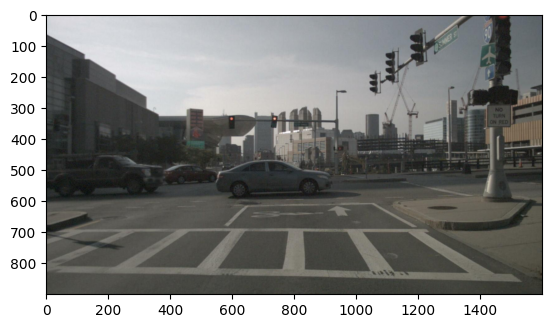

In [92]:
plt.imshow(rgb)

In [93]:
top_crop_rgb = np.array(rgb)[160:320, :]

True

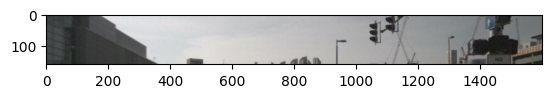

In [94]:
plt.imshow(top_crop_rgb)
cv2.imwrite('top_crop_rgb.png', cv2.cvtColor(top_crop_rgb, cv2.COLOR_RGB2BGR))

In [103]:
# Crop top of the camera_coord and points_set
def crop_pointcloud(points_set_or, camera_coord_or, i, j, h, w):
    points_set = np.copy(points_set_or)
    camera_coord = np.copy(camera_coord_or)

    camera_coord[:, 1] -= i
    camera_coord[:, 0] -= j
    selected_i = np.logical_and(
                        camera_coord[:, 1] >= 0, camera_coord[:, 1] < h)
    selected_j = np.logical_and(
                        camera_coord[:, 0] >= 0, camera_coord[:, 0] < w)
    selected = np.logical_and(selected_i, selected_j)
    points_set = points_set[selected, :]
    camera_coord = camera_coord[selected, :]

    return points_set, camera_coord, selected

In [104]:
top_crop_points_set, top_crop_camera_coord, _ = crop_pointcloud(
            points_set, camera_coord, 0, 0, 320, 480)

In [105]:
rgb_np = np.array(rgb)
rgb_zero = np.zeros([320, 480,3], dtype=np.uint8)

In [106]:
x = np.zeros((320, 480))
y = np.zeros((320, 480))
z = np.zeros((320, 480))

In [107]:
rows = np.floor(top_crop_camera_coord[:, 1])
cols = np.floor(top_crop_camera_coord[:, 0])

In [108]:
cmap = plt.cm.get_cmap('gray')
cmap = np.array([cmap(i) for i in range(256)])[:,:3] * 256

In [109]:
X = top_crop_points_set[:, 0]
for i in range(top_crop_camera_coord.shape[0]):
    X_norm = ((X[i]- X.min())/(X.max()-X.min())) * 255
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    x[int(rows), int(cols)] = X_norm

True

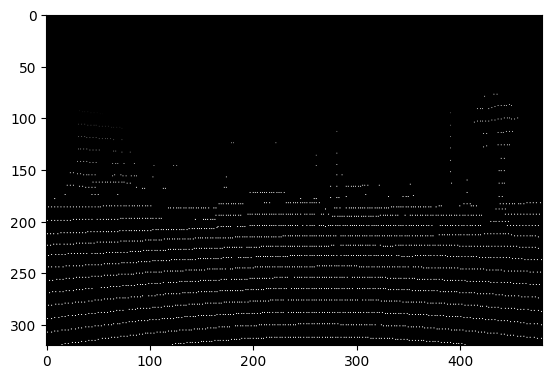

In [110]:
plt.imshow(x, cmap='gray')
cv2.imwrite('x.png', x)

In [111]:
Y = top_crop_points_set[:, 1]
for i in range(top_crop_camera_coord.shape[0]):
    Y_norm = ((Y[i]- Y.min())/(Y.max()-Y.min())) * 255
    #color = cmap[int(X_norm), :]
    #print(X_norm)
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    y[int(rows), int(cols)] = Y_norm

True

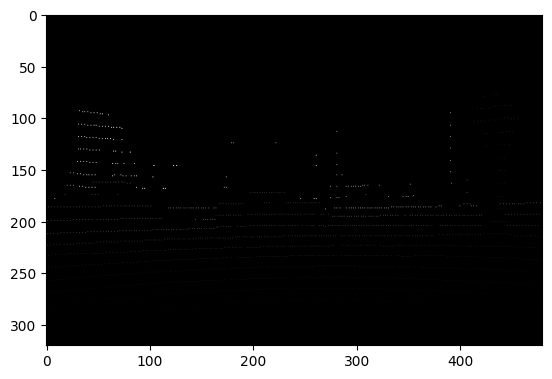

In [112]:
plt.imshow(y, cmap='gray')
cv2.imwrite('y.png', y)

In [113]:
Z = top_crop_points_set[:, 2]
for i in range(top_crop_camera_coord.shape[0]):
    Z_norm = ((Z[i]- Z.min())/(Z.max()-Z.min())) * 255
    #color = cmap[int(X_norm), :]
    #print(X_norm)
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    z[int(rows), int(cols)] = Z_norm

True

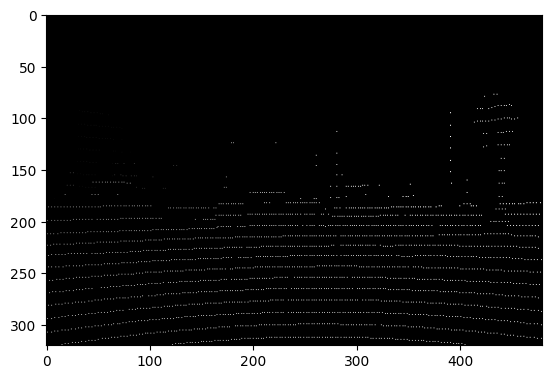

In [114]:
plt.imshow(z, cmap='gray')
cv2.imwrite('z.png', z)

In [117]:
x_cv = cv2.imread('./x.png')
kernel = np.ones((3, 3), np.uint8)
X_dilation = cv2.dilate(x_cv, kernel, iterations=1)

True

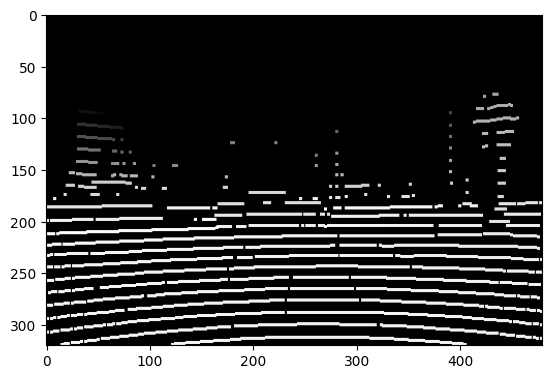

In [118]:
plt.imshow(X_dilation, cmap='gray')
cv2.imwrite('x_dil.png', X_dilation)

In [119]:
y_cv = cv2.imread('./y.png')
kernel = np.ones((3, 3), np.uint8)
Y_dilation = cv2.dilate(y_cv, kernel, iterations=1)

True

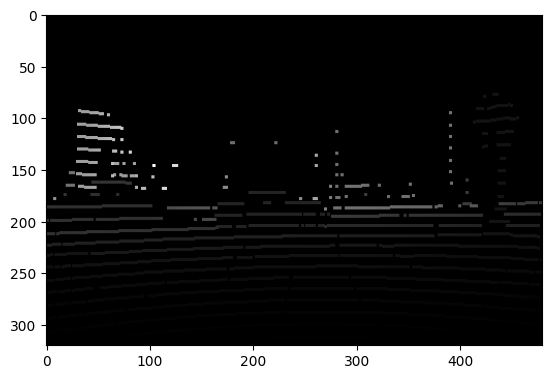

In [120]:
plt.imshow(Y_dilation, cmap='gray')
cv2.imwrite('y_dil.png', Y_dilation)

In [121]:
z_cv = cv2.imread('./z.png')
kernel = np.ones((3, 4), np.uint8)
Z_dilation = cv2.dilate(z_cv, kernel, iterations=1)

True

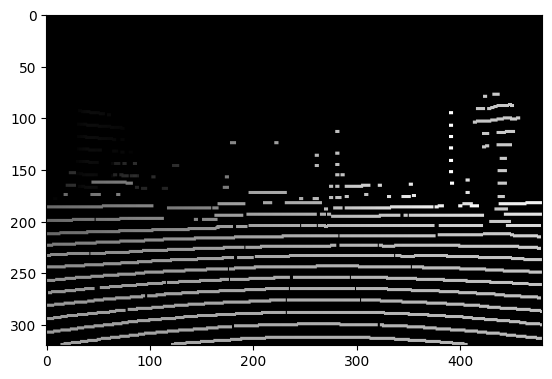

In [122]:
plt.imshow(Z_dilation, cmap='gray')
cv2.imwrite('z_dil.png', Z_dilation)